# Machine Learning Models Training
This notebook trains LightGBM, XGBoost, and Random Forest models for glucose prediction using the existing training pipeline.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Granada-miei/Granada-evaluate-val-set

Mounted at /content/drive
/content/drive/MyDrive/Granada-miei/Granada-evaluate-val-set


In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
sys.path.insert(0, '/content/drive/MyDrive/Granada-miei/Granada-evaluate-val-set/training')

In [6]:
# Import training functions
from training.split_data import load_splits, print_results
from training.train_ml import create_model, save_model, evaluate_and_save_results

print("Imports completed successfully!")

Imports completed successfully!


## Configuration

In [7]:
# Configuration
OUTPUT_PATH = "outputs"
SEED = 42
MODELS = ["lgb", "xgb", "rf"]

# Create output directory
os.makedirs(OUTPUT_PATH, exist_ok=True)

print(f"Output directory: {OUTPUT_PATH}")
print(f"Models to train: {MODELS}")
print(f"Random seed: {SEED}")

Output directory: outputs
Models to train: ['lgb', 'xgb', 'rf']
Random seed: 42


## Load Data

In [8]:
# Load pre-prepared data splits
print("Loading pre-prepared data splits...")
train_set, val_set, test_set, X_cols, y_cols = load_splits()

print(f"\nDataset information:")
print(f"Train set: {len(train_set):,} samples")
print(f"Validation set: {len(val_set):,} samples")
print(f"Test set: {len(test_set):,} samples")
print(f"Features: {len(X_cols)}")
print(f"Target: {y_cols[-1]}")

print(f"\nFeature columns (first 10): {X_cols[:10]}")
if len(X_cols) > 10:
    print(f"... and {len(X_cols) - 10} more")

Loading pre-prepared data splits...

Dataset information:
Train set: 14,058,224 samples
Validation set: 1,861,178 samples
Test set: 3,945,594 samples
Features: 8
Target: lead30

Feature columns (first 10): ['lag105', 'lag90', 'lag75', 'lag60', 'lag45', 'lag30', 'lag15', 'lag0']


## Training Pipeline

In [9]:
# Store training results
training_results = {}
models = {}

for model_name in MODELS:
    print(f"\n{'='*60}")
    print(f"Training {model_name.upper()} Model")
    print(f"{'='*60}")

    try:
        # Create model
        print(f"Creating {model_name.upper()} model...")
        model = create_model(model_name, SEED)

        # Train model
        print(f"Training {model_name.upper()} model on training set...")
        model.fit(train_set[X_cols], train_set[y_cols[-1]])

        # Save model
        model_path = f"{OUTPUT_PATH}/{model_name}.pickle"
        save_model(model, model_path)

        # Evaluate and save results
        print(f"\nEvaluating {model_name.upper()} model on validation set:")
        results = evaluate_and_save_results(
            model, val_set, X_cols, y_cols, OUTPUT_PATH, model_name
        )

        # Store results
        training_results[model_name] = results
        models[model_name] = model

        print(f"\n✅ {model_name.upper()} training completed successfully!")

    except Exception as e:
        print(f"\n❌ Error training {model_name.upper()}: {str(e)}")
        continue

print(f"\n{'='*60}")
print("All Models Training Completed!")
print(f"{'='*60}")


Training LGB Model
Creating LGB model...
Training LGB model on training set...
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 14058224, number of used features: 8
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (107.26 MB) transferred to GPU in 0.227793 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score -0.318962
Model saved to: outputs/lgb.pickle

Evaluating LGB model on validation set:
Cumulative
Samples: 1861178
MAE: 14.29(2.21)
MAPE: 10.04(1.75)
RMSE: 19.66(3.07)
~~~~~~~~~~
Normal
Samples: 1147765
MAE: 12.80(2.05)
MAPE: 10.48(1.77)
RMSE: 17.79(2.91)
~~~~~~~~~~
Hyper
Samples: 614538
MAE: 16.88(2

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [15:01:06] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Cumulative
Samples: 1861178
MAE: 14.05(2.13)
MAPE: 9.85(1.71)
RMSE: 19.37(2.96)
~~~~~~~~~~
Normal
Samples: 1147765
MAE: 12.61(1.98)
MAPE: 10.31(1.72)
RMSE: 17.55(2.80)
~~~~~~~~~~
Hyper
Samples: 614538
MAE: 16.62(2.40)
MAPE: 7.24(0.94)
RMSE: 22.48(3.12)
~~~~~~~~~~
Hypo
Samples: 98875
MAE: 14.53(2.31)
MAPE: 24.60(4.28)
RMSE: 18.09(3.36)
Results saved to: outputs/xgb_output.csv

✅ XGB training completed successfully!

Training RF Model
Creating RF model...
Training RF model on training set...
Model saved to: outputs/rf.pickle

Evaluating RF model on validation set:
Cumulative
Samples: 1861178
MAE: 14.82(2.39)
MAPE: 10.50(1.96)
RMSE: 20.35(3.34)
~~~~~~~~~~
Normal
Samples: 1147765
MAE: 13.06(2.10)
MAPE: 10.73(1.84)
RMSE: 18.12(3.01)
~~~~~~~~~~
Hyper
Samples: 614538
MAE: 17.57(2.78)
MAPE: 7.61(1.05)
RMSE: 23.75(3.60)
~~~~~~~~~~
Hypo
Samples: 98875
MAE: 17.81(2.88)
MAPE: 30.23(5.37)
RMSE: 21.12(3.63)
Results saved to: outputs/rf_output.csv

✅ RF training completed successfully!

All Models Tr

## Results Summary

In [10]:
# Display training summary
print("Training Summary:")
print(f"Successfully trained models: {list(training_results.keys())}")
print(f"Total models trained: {len(training_results)}/{len(MODELS)}")

# Display sample counts for each model
if training_results:
    print("\nValidation set results sample counts:")
    for model_name, results in training_results.items():
        print(f"{model_name.upper()}: {len(results):,} predictions")

Training Summary:
Successfully trained models: ['lgb', 'xgb', 'rf']
Total models trained: 3/3

Validation set results sample counts:
LGB: 1,861,178 predictions
XGB: 1,861,178 predictions
RF: 1,861,178 predictions


## Quick Results Comparison

In [11]:
# Quick metrics comparison
if training_results:
    print("\nQuick Performance Comparison (MAE on validation set):")
    print("-" * 50)

    model_maes = {}

    for model_name, results in training_results.items():
        # Calculate overall MAE
        overall_mae = np.mean(np.abs(results['target'] - results['y_pred']))
        model_maes[model_name] = overall_mae
        print(f"{model_name.upper()}: {overall_mae:.2f} mg/dL")

    # Find best model
    if model_maes:
        best_model = min(model_maes, key=model_maes.get)
        print(f"\n🏆 Best performing model: {best_model.upper()} (MAE: {model_maes[best_model]:.2f})")


Quick Performance Comparison (MAE on validation set):
--------------------------------------------------
LGB: 14.29 mg/dL
XGB: 14.06 mg/dL
RF: 14.81 mg/dL

🏆 Best performing model: XGB (MAE: 14.06)


## Visualize Predictions for Best Model

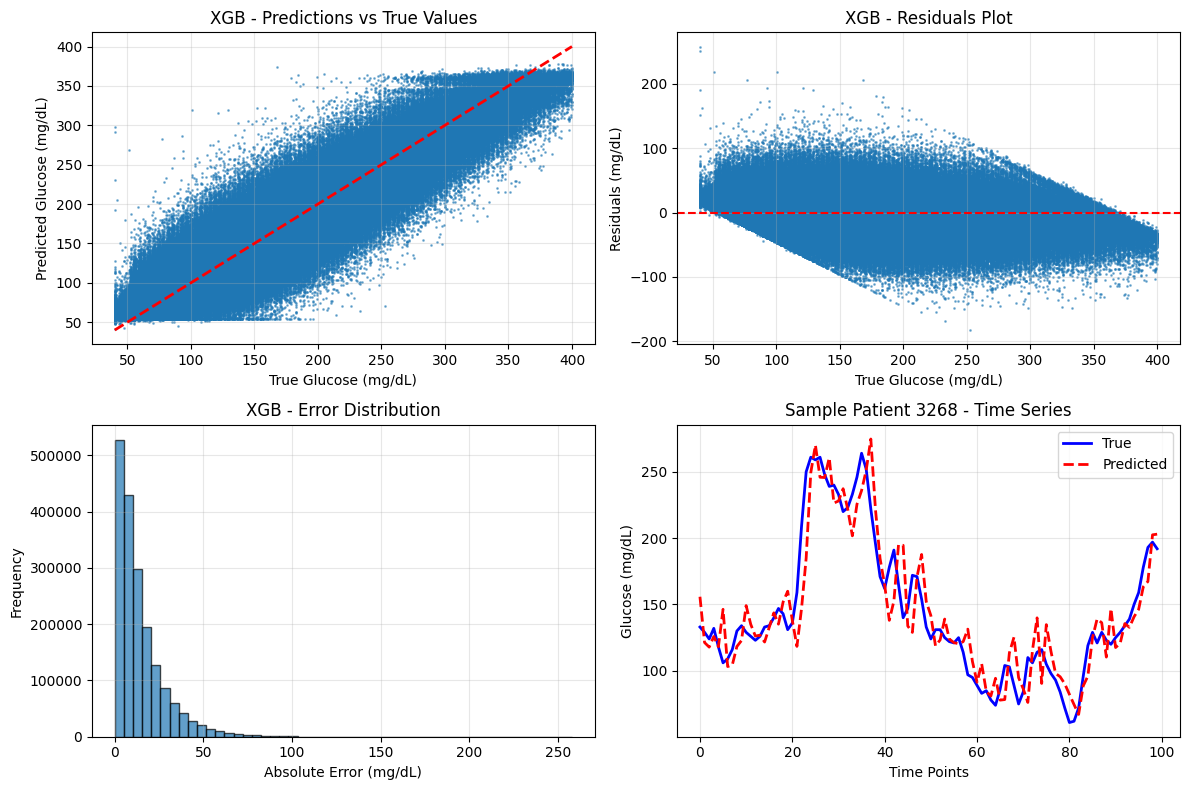


Visualization saved to: outputs/training_results_visualization.png


In [12]:
# Plot predictions vs targets for the best model
if training_results and 'best_model' in locals():
    plt.figure(figsize=(12, 8))

    results = training_results[best_model]

    # Scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(results['target'], results['y_pred'], alpha=0.5, s=1)
    plt.plot([results['target'].min(), results['target'].max()],
             [results['target'].min(), results['target'].max()], 'r--', lw=2)
    plt.xlabel('True Glucose (mg/dL)')
    plt.ylabel('Predicted Glucose (mg/dL)')
    plt.title(f'{best_model.upper()} - Predictions vs True Values')
    plt.grid(True, alpha=0.3)

    # Residuals plot
    plt.subplot(2, 2, 2)
    residuals = results['y_pred'] - results['target']
    plt.scatter(results['target'], residuals, alpha=0.5, s=1)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('True Glucose (mg/dL)')
    plt.ylabel('Residuals (mg/dL)')
    plt.title(f'{best_model.upper()} - Residuals Plot')
    plt.grid(True, alpha=0.3)

    # Error distribution
    plt.subplot(2, 2, 3)
    plt.hist(np.abs(residuals), bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel('Absolute Error (mg/dL)')
    plt.ylabel('Frequency')
    plt.title(f'{best_model.upper()} - Error Distribution')
    plt.grid(True, alpha=0.3)

    # Time series sample
    plt.subplot(2, 2, 4)
    # Sample a random patient for time series visualization
    sample_patient = results['Patient_ID'].iloc[0]
    patient_data = results[results['Patient_ID'] == sample_patient].head(100)

    if len(patient_data) > 10:
        plt.plot(range(len(patient_data)), patient_data['target'], 'b-', label='True', linewidth=2)
        plt.plot(range(len(patient_data)), patient_data['y_pred'], 'r--', label='Predicted', linewidth=2)
        plt.xlabel('Time Points')
        plt.ylabel('Glucose (mg/dL)')
        plt.title(f'Sample Patient {sample_patient} - Time Series')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{OUTPUT_PATH}/training_results_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nVisualization saved to: {OUTPUT_PATH}/training_results_visualization.png")

## Files Generated

In [13]:
# List all generated files
print("Generated files in outputs directory:")
print("-" * 40)

if os.path.exists(OUTPUT_PATH):
    files = os.listdir(OUTPUT_PATH)
    model_files = [f for f in files if any(model in f for model in MODELS)]

    for file in sorted(model_files):
        file_path = os.path.join(OUTPUT_PATH, file)
        size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"📁 {file:<30} ({size_mb:.2f} MB)")

    print(f"\nTotal files generated: {len(model_files)}")
else:
    print("No output directory found.")

Generated files in outputs directory:
----------------------------------------
📁 lgb.pickle                     (0.33 MB)
📁 lgb_output.csv                 (102.48 MB)
📁 rf.pickle                      (620.50 MB)
📁 rf_output.csv                  (86.89 MB)
📁 xgb.pickle                     (0.48 MB)
📁 xgb_output.csv                 (86.89 MB)

Total files generated: 6


## Next Steps

In [14]:
print("\n🎯 Next Steps:")
print("1. Run generate_csv_results.py to get detailed metrics comparison")
print("2. Use generate_plots.ipynb to create visualization plots")
print("3. Run generate_ceg.ipynb for Clarke Error Grid analysis")
print("4. Use xai_ml.py for SHAP analysis on the best performing model")

if 'best_model' in locals():
    print(f"\n💡 Recommended SHAP analysis command:")
    print(f"python xai_ml.py --model_name {best_model}")

print("\n✅ Training pipeline completed successfully!")


🎯 Next Steps:
1. Run generate_csv_results.py to get detailed metrics comparison
2. Use generate_plots.ipynb to create visualization plots
3. Run generate_ceg.ipynb for Clarke Error Grid analysis
4. Use xai_ml.py for SHAP analysis on the best performing model

💡 Recommended SHAP analysis command:
python xai_ml.py --model_name xgb

✅ Training pipeline completed successfully!
